# Bidirectional approach

In [1]:
#import libraries
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
path_to_file = "8_ways_data_science_can_help.txt" #Enter article name here

In [3]:
tokenizer = Tokenizer()

In [4]:
text = open(path_to_file,'rb').read().decode(encoding='utf-8')
print(f'The length of the article is {len(text)}')

The length of the article is 6999


In [5]:
data = text.lower().replace('\xa0\xa0','')

In [6]:
data = text.lower().replace('\xa0','')
data = data.split(".")
#data

In [7]:
tokenizer.fit_on_texts(data)
total_words = len(tokenizer.word_index) + 1

#print(tokenizer.word_index)
#print(total_words)

In [8]:
print(total_words)

525


In [9]:
input_sequences = []
for line in data:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        #print(i)
        n_gram_sequence = token_list[:i+1]
        #print("N_gram: "+ n_gram_sequence)
        input_sequences.append(n_gram_sequence)
#print(input_sequences)
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [10]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.983):
            print("\nReached acceptable accuary!")
            self.model.stop_training = True

In [11]:
callback = myCallback()
model = Sequential()
model.add(Embedding(total_words, 128, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(40)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=1000, verbose=1,callbacks=[callback])

Epoch 1/1000
33/33 [==============================] - 9s 14ms/step - loss: 6.2484 - accuracy: 0.0235
Epoch 2/1000
33/33 [==============================] - 0s 11ms/step - loss: 5.8744 - accuracy: 0.0391
Epoch 3/1000
33/33 [==============================] - 0s 11ms/step - loss: 5.7325 - accuracy: 0.0341
Epoch 4/1000
33/33 [==============================] - 0s 11ms/step - loss: 5.6173 - accuracy: 0.0266
Epoch 5/1000
33/33 [==============================] - 0s 11ms/step - loss: 5.6569 - accuracy: 0.0433
Epoch 6/1000
33/33 [==============================] - 0s 11ms/step - loss: 5.5721 - accuracy: 0.0337
Epoch 7/1000
33/33 [==============================] - 0s 11ms/step - loss: 5.5241 - accuracy: 0.0395
Epoch 8/1000
33/33 [==============================] - 0s 11ms/step - loss: 5.5385 - accuracy: 0.0387
Epoch 9/1000
33/33 [==============================] - 0s 11ms/step - loss: 5.3532 - accuracy: 0.0455
Epoch 10/1000
33/33 [==============================] - 0s 11ms/step - loss: 5.2660 - accura

In [12]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

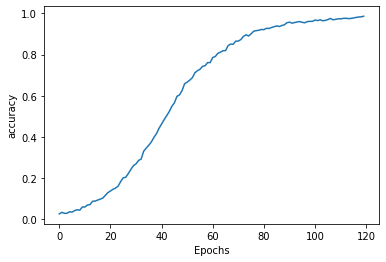

In [13]:
plot_graphs(history, 'accuracy')

In [27]:
#seed_text = "Using data science to optimize your budget"
#seed_text = "rich customer experience has always been an important factor"
seed_text = "This can be highly beneficial"
next_words = 20

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
    predicted = model.predict_classes(token_list,verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


This can be highly beneficial as it tells the marketer exactly which channel and medium are delivering proper returns cross channel micro copy on landing
